In [83]:
import pandas as pd #data manipulation
import random #random numbers
import seaborn as sns 
from sklearn.ensemble import RandomForestRegressor #regression using Random forest
from sklearn.model_selection import train_test_split #for splitting data into training and test set
import matplotlib.pyplot as plt 
from sklearn.model_selection import cross_val_score #to find cross validation score
from sklearn.metrics import make_scorer, mean_squared_error 
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.model_selection import cross_val_predict 
import numpy as np #handling multidimensional arrays.

1. Create a dictionary to hold the modified mobile phone data

 - dictionary keys represent different attributes of a phone, such as "Model", "Brand", "Price", etc.
 
 - The values for these keys generated using list and the random library functions, 
 
 - which fill the attributes with random data

In [58]:

# Number of rows (mobile phones)
num_phones = 200

phone_data = {
    "Model": ["Phone Model " + str(i) for i in range(1, num_phones + 1)],
    "Brand": [random.choice(["Apple", "Samsung", "Google", "OnePlus", "Xiaomi"]) for _ in range(num_phones)],
    "Price": [random.uniform(200, 1200) for _ in range(num_phones)],
    "Display_Size": [round(random.uniform(5.0, 6.7), 1) for _ in range(num_phones)],
    "Resolution": [random.choice(["1080 x 2340", "1440 x 3200", "1125 x 2436", "1080 x 2400"]) for _ in range(num_phones)],
    "Camera_Resolution": [random.randint(8, 108) for _ in range(num_phones)],
    "Processor": [random.choice(["Apple A15 Bionic", "Qualcomm Snapdragon 888", "Exynos 2100", "Google Tensor"]) for _ in range(num_phones)],
    "RAM": [random.choice([4, 6, 8, 12]) for _ in range(num_phones)],
    "Storage_Capacity_GB": [random.choice([64, 128, 256, 512]) for _ in range(num_phones)],
    "Battery_Capacity_mAh": [random.randint(3000, 6000) for _ in range(num_phones)],
    "Operating_System": [random.choice(["iOS 15", "Android 11", "OxygenOS 11", "MIUI 12"]) for _ in range(num_phones)],
    "Network": [random.choice(["5G", "4G", "3G", "2G"]) for _ in range(num_phones)],
    "Weight_g": [random.randint(150, 250) for _ in range(num_phones)],
    "Dimensions_mm": [f"{random.uniform(140, 160):.1f} x {random.uniform(65, 75):.1f} x {random.uniform(6, 10):.1f}" for _ in range(num_phones)],
    "Color": [random.choice(["Black", "White", "Blue", "Red", "Silver"]) for _ in range(num_phones)],
    "Water_Resistant": [random.choice(["IP68", "IP67", "N/A"]) for _ in range(num_phones)],
    "Face_Recognition": [random.choice(["Yes", "No"]) for _ in range(num_phones)],
    "Fingerprint_Sensor": [random.choice(["Yes", "No"]) for _ in range(num_phones)],
    "Wireless_Charging": [random.choice(["Yes", "No"]) for _ in range(num_phones)],
    "Released_Year": [random.randint(2017, 2023) for _ in range(num_phones)],
    "Other_Feature_1": [random.choice(["NFC", "IR Blaster", "3.5mm Jack", "Stereo Speakers", "Foldable"]) for _ in range(num_phones)],
    "Other_Feature_2": [random.choice(["Wireless Earbuds Included", "Fast Charging", "Stylus Support", "Game Mode"]) for _ in range(num_phones)],
    "Other_Feature_3": [random.choice(["Dual SIM", "eSIM", "Expandable Storage"]) for _ in range(num_phones)],
    "Rating": [round(random.uniform(3.5, 5.0), 1) for _ in range(num_phones)]
}


- Create dataframe: dictionary phone_data is then converted into a pandas DataFrame called 'phone_df'. 

- This DataFrame is a table where each row represents a phone and each column represents an attribute of the phones.

- Save dataframe: The DataFrame 'phone_df' is then saved to a CSV file named "mobile_data.csv".

- This file can be used for further analysis or to share the data.

In [59]:
# Create a DataFrame

phone_df = pd.DataFrame(phone_data)

# Save the DataFrame to a CSV file
phone_df.to_csv("mobile_data.csv", index=False)

Reading the CSV File: After saving the DataFrame, it's immediately read back from the CSV file into a new DataFrame df using pd.read_csv.

Displaying the Data: Finally, the .head() method is called on df, which displays the first five rows of the DataFrame. This is a common way to quickly check the top entries of your dataset to ensure it's been created or loaded correctly.

In [60]:
df=pd.read_csv('mobile_data.csv')

df.head()

,Model,Brand,Price,Display_Size,Resolution,Camera_Resolution,Processor,RAM,Storage_Capacity_GB,Battery_Capacity_mAh,...,Color,Water_Resistant,Face_Recognition,Fingerprint_Sensor,Wireless_Charging,Released_Year,Other_Feature_1,Other_Feature_2,Other_Feature_3,Rating
0,Phone Model 1,Samsung,971.656336,5.8,1080 x 2340,96,Google Tensor,12,128,3221,...,Blue,IP67,No,No,No,2023,Foldable,Wireless Earbuds Included,Dual SIM,3.5
1,Phone Model 2,Xiaomi,648.442233,5.7,1440 x 3200,9,Exynos 2100,4,512,5266,...,Red,IP67,No,Yes,No,2021,Foldable,Game Mode,Dual SIM,4.8
2,Phone Model 3,Apple,830.542641,5.2,1125 x 2436,101,Google Tensor,4,64,5066,...,Blue,NaN,Yes,No,Yes,2021,Foldable,Game Mode,Expandable Storage,4.0
3,Phone Model 4,OnePlus,381.809259,6.7,1440 x 3200,37,Apple A15 Bionic,12,64,4198,...,Silver,NaN,Yes,No,No,2020,Stereo Speakers,Wireless Earbuds Included,Expandable Storage,4.1
4,Phone Model 5,Apple,991.563604,6.1,1080 x 2340,105,Google Tensor,12,64,3864,...,Blue,NaN,Yes,Yes,No,2020,Stereo Speakers,Game Mode,Dual SIM,4.7


In [61]:
df.isnull().sum() #This line of code checks for missing values in each column of the DataFrame df. 

Model                    0
Brand                    0
Price                    0
Display_Size             0
Resolution               0
Camera_Resolution        0
Processor                0
RAM                      0
Storage_Capacity_GB      0
Battery_Capacity_mAh     0
Operating_System         0
Network                  0
Weight_g                 0
Dimensions_mm            0
Color                    0
Water_Resistant         65
Face_Recognition         0
Fingerprint_Sensor       0
Wireless_Charging        0
Released_Year            0
Other_Feature_1          0
Other_Feature_2          0
Other_Feature_3          0
Rating                   0
dtype: int64

In [62]:
df.duplicated().sum() #This line checks for duplicate rows in the DataFrame.

0

In [63]:
df.columns #This line simply retrieves all the column names in the DataFrame df

Index(['Model', 'Brand', 'Price', 'Display_Size', 'Resolution',
       'Camera_Resolution', 'Processor', 'RAM', 'Storage_Capacity_GB',
       'Battery_Capacity_mAh', 'Operating_System', 'Network', 'Weight_g',
       'Dimensions_mm', 'Color', 'Water_Resistant', 'Face_Recognition',
       'Fingerprint_Sensor', 'Wireless_Charging', 'Released_Year',
       'Other_Feature_1', 'Other_Feature_2', 'Other_Feature_3', 'Rating'],
      dtype='object')

In [65]:
# Calculate the average for the "Price" column
average_price = phone_df['Price'].mean()

 

# Calculate the median for the "Price" column
median_price = phone_df['Price'].median()

 

# Find the row with the highest Price
highest_price = phone_df.loc[phone_df['Price'].idxmax()]

 

# Find the row with the lowest Price
lowest_price = phone_df.loc[phone_df['Price'].idxmin()]

 

# Print the results
print("Average Price:", average_price)
print("Median Price:", median_price)
print("Highest Price:", highest_price)
print("Lowest Price:", lowest_price)




Average Price: 674.0668187257328
Median Price: 667.8110588865027
Highest Price: Model                              Phone Model 86
Brand                                      Google
Price                                 1192.748206
Display_Size                                  5.8
Resolution                            1440 x 3200
Camera_Resolution                              86
Processor                           Google Tensor
RAM                                            12
Storage_Capacity_GB                           512
Battery_Capacity_mAh                         3004
Operating_System                          MIUI 12
Network                                        3G
Weight_g                                      202
Dimensions_mm                  141.0 x 71.1 x 7.9
Color                                       Black
Water_Resistant                               N/A
Face_Recognition                               No
Fingerprint_Sensor                            Yes
Wireless_Charging   

#correlation analysis and visualization

In [66]:
#This line selects columns that contain numeric data (either floating-point or integer) to be used in a correlation analysis.
numeric_cols = df.select_dtypes(include=[float, int])

#Calculates the correlation matrix, which is a table showing the correlation coefficients between variables. 

#Each cell in the table shows the correlation between two variables. The correlation coefficient ranges from -1 to 1, 

#where closer to 1 means a strong positive correlation, closer to -1 means a strong negative correlation, 

#and closer to 0 means no correlation.

correlation_matrix = numeric_cols.corr()

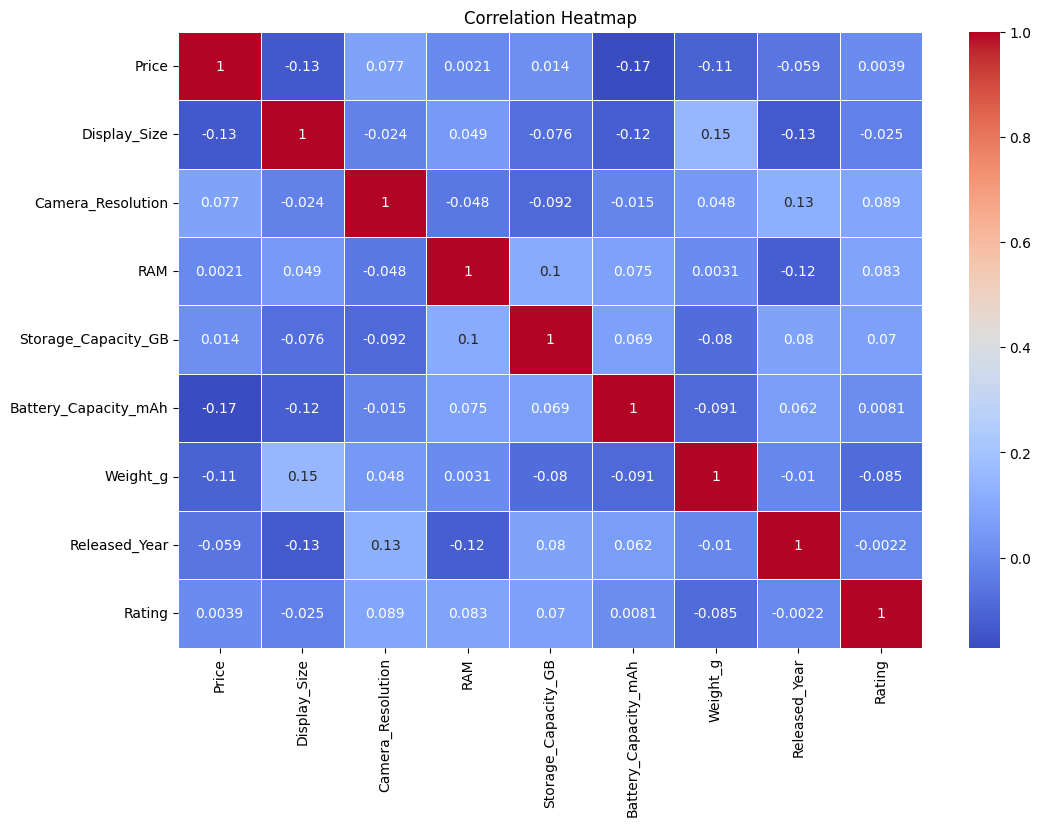

In [67]:
#Sets up the figure size for the heatmap that will be plotted.
plt.figure(figsize=(12, 8))

#Uses seaborn's heatmap function to create a heatmap of the correlation matrix. 
#annot=True displays the correlation coefficients on the heatmap. cmap='coolwarm' sets the color map of the heatmap, 
#and linewidths=0.5 sets the width of the lines that will divide each cell.
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)


plt.title("Correlation Heatmap")
plt.show()

In [68]:
X = df.drop(['Price', 'Model'], axis=1)
#creates a DataFrame X by dropping two columns, 'Price' and 'Model', 
#from the DataFrame df. 
#The resulting DataFrame contains the features used for modeling.

In [69]:
X = pd.get_dummies(X)
#one-hot encoding to the DataFrame X. 
#This is done to convert categorical variables into numerical format so that they can be used as input features for a ML model.

In [70]:
y = df['Price']
# creates a Series y containing the target variable 'Price'. 
#This variable represents the value you want to predict using the machine learning model.

In [71]:
model = RandomForestRegressor(n_estimators=100, random_state=42)
#a Random Forest Regressor model is instantiated with 100 decision trees (estimators)
#and a fixed random seed of 42 for reproducibility. 
#The RandomForestRegressor is a machine learning model used for regression tasks.

In [72]:
model.fit(X, y)

#trains (fits) the Random Forest Regressor model using the features in X and the target variable y. 
#This is where the model learns to make predictions based on the input features.

RandomForestRegressor(random_state=42)

In [73]:
feature_importances = model.feature_importances_

#calculates the feature importances. 
#Feature importances represent how much each feature contributes to making predictions with the trained model. 
#Higher importances indicate more influential features.

In [74]:
feature_names = X.columns
#feature_names is created to store the names of all the features in the DataFrame X. 
#These names correspond to the columns of X after one-hot encoding.

In [75]:
sorted_idx = feature_importances.argsort()[::-1]
#sorts the feature importances in descending order and stores the indices of the sorted features in sorted_idx. 
#This allows you to identify which features are the most important for the model.

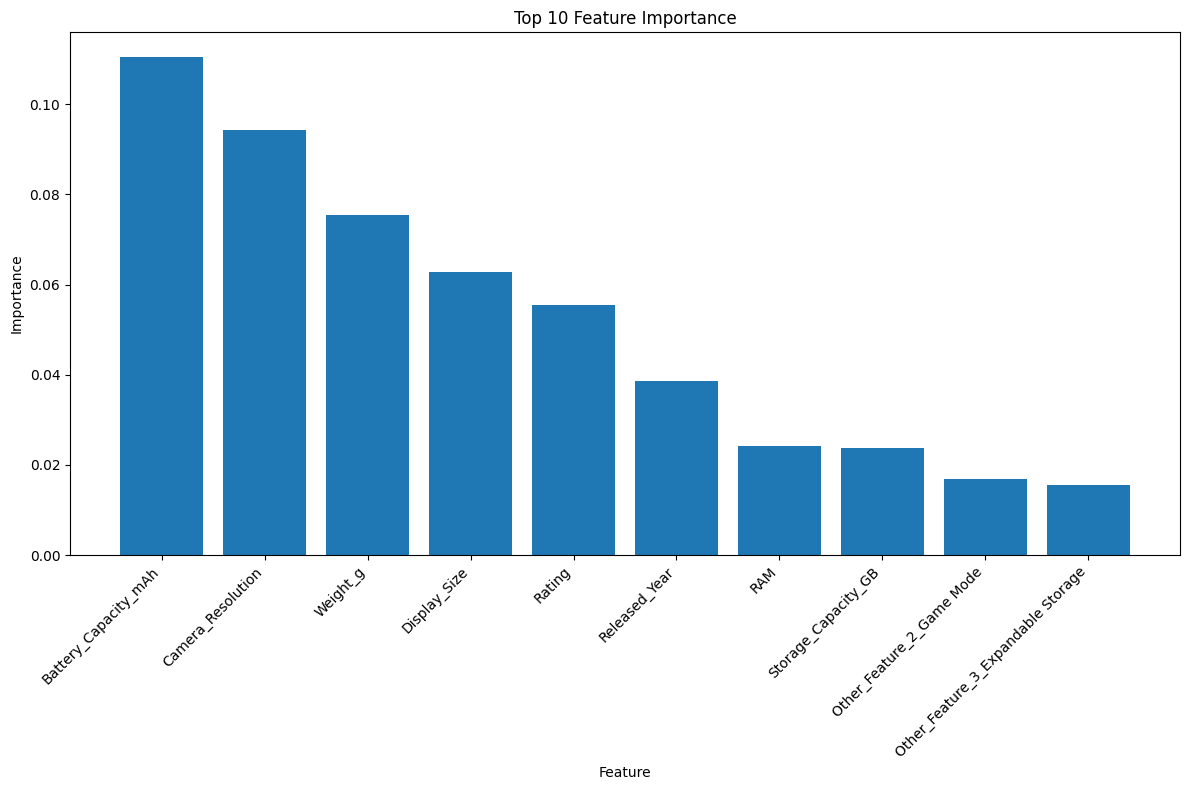

In [76]:
N = 10  # Number of top features to display

plt.figure(figsize=(12, 8))
plt.bar(range(N), feature_importances[sorted_idx][:N])

#bar plot is created here to display the top N (in this case, 10) feature importances. 
plt.xticks(range(N), [feature_names[i] for i in sorted_idx][:N], rotation=45, ha="right")
plt.xlabel('Feature')
plt.ylabel('Importance')
plt.title('Top {} Feature Importance'.format(N))
plt.tight_layout()
plt.show()

#output of this code will be a bar plot that shows the top 10 most important features for the Random Forest Regressor model. 

- Evaluating the performance of a machine learning regression model using cross-validation 

- and visualizing the root mean squared error (RMSE) scores. 

In [77]:
rmse_scores = -cross_val_score(model, X, y, cv=5, scoring="neg_root_mean_squared_error")

#cross_val_score is a function from the scikit-learn library that performs k-fold cross-validation. 
#In this case, cv=5 specifies 5-fold cross-validation, which means the dataset will be split into 5 parts, 
#and the model will be trained and tested on each of them.

#model represents the trained regression model (in this case, the Random Forest Regressor) that you want to evaluate.

#X is the feature matrix, and y is the target variable.

#scoring="neg_root_mean_squared_error" specifies that you want to use the negative RMSE as the evaluation metric. 
#The negative sign is used because scikit-learn typically maximizes metrics, 
#but in this case, we want to minimize RMSE.

#The result, rmse_scores, is an array containing the negative RMSE scores for each fold of cross-validation.

In [78]:
mean_rmse = np.mean(rmse_scores)

#calculates the mean of the negative RMSE scores across all the folds. 
#overall measure of how well the model is performing on average across different cross-validation folds.

In [79]:
print("Mean Cross-Validation RMSE:", mean_rmse)

Mean Cross-Validation RMSE: 284.6895434458238


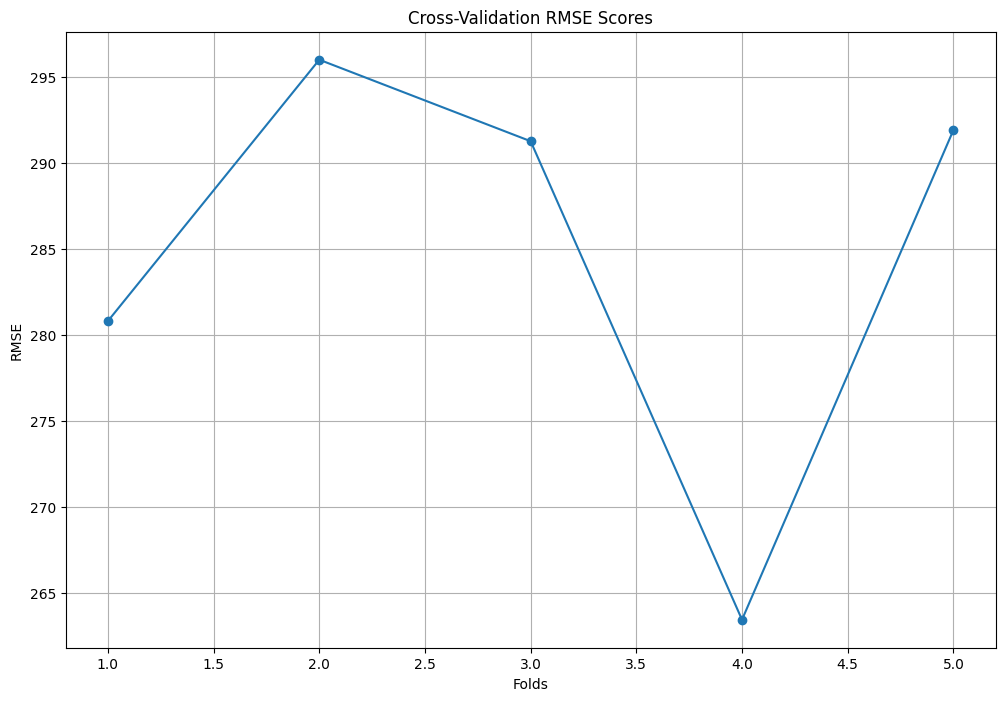

In [82]:
plt.figure(figsize=(12, 8))
plt.plot(range(1, len(rmse_scores) + 1), rmse_scores, marker='o', linestyle='-')
plt.xlabel('Folds')
plt.ylabel('RMSE')
plt.title('Cross-Validation RMSE Scores')
plt.grid(True)
plt.show()

#Cross-validation is used to assess how well the model generalizes to new, unseen data. 
#The RMSE scores for each fold of cross-validation help you understand the model's performance variability 
#and its overall accuracy in predicting target values.

In [86]:
mse_scores = cross_val_predict(model, X, y, cv=5)
mean_mse = mean_squared_error(y, mse_scores)

In [87]:
mae_scores = cross_val_predict(model, X, y, cv=5)
mean_mae = mean_absolute_error(y, mae_scores)

In [88]:
print("Mean Squared Error (MSE):", mean_mse)
print("Mean Absolute Error (MAE):", mean_mae)

Mean Squared Error (MSE): 81185.90550107585
Mean Absolute Error (MAE): 244.96868388576803


In [89]:
estimators_range = range(1, 101)

In [90]:
mse_values = []

for n_estimators in estimators_range:
    model = RandomForestRegressor(n_estimators=n_estimators, random_state=42)
    mse_scores = -cross_val_score(model, X, y, cv=5, scoring='neg_mean_squared_error')
    mean_mse = mse_scores.mean()
    mse_values.append(mean_mse)
    
    # used to perform hyperparameter tuning for the number of estimators in a Random Forest Regressor model (n_estimators). 
    #It evaluates the mean squared error (MSE) of the model using cross-validation for different values of n_estimators 
    #and stores the mean MSE values in a list. 

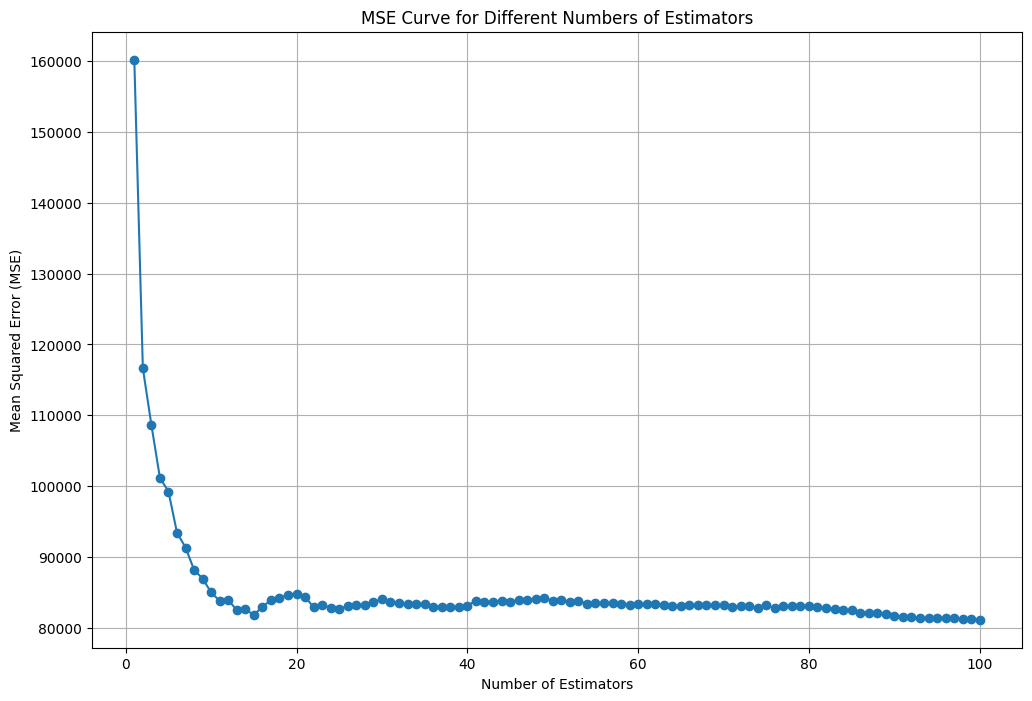

In [91]:
plt.figure(figsize=(12, 8))
plt.plot(estimators_range, mse_values, marker='o')
plt.xlabel('Number of Estimators')
plt.ylabel('Mean Squared Error (MSE)')
plt.title('MSE Curve for Different Numbers of Estimators')
plt.grid(True)
plt.show()

In [92]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42) 

In [93]:
estimators_range = range(1, 101)

In [94]:
train_mse_values = []
test_mse_values = []

In [95]:
for n_estimators in estimators_range:
    model = RandomForestRegressor(n_estimators=n_estimators, random_state=42)
    model.fit(X_train, y_train)

    train_predictions = model.predict(X_train)
    train_mse = mean_squared_error(y_train, train_predictions)
    train_mse_values.append(train_mse)

    test_predictions = model.predict(X_test)
    test_mse = mean_squared_error(y_test, test_predictions)
    test_mse_values.append(test_mse)
    
    #hyperparameter tuning experiment for the n_estimators parameter in a Random Forest Regressor model.
    #It trains the model with various values of n_estimators 
    #and assesses how well the model fits both the training and testing datasets 
    #by calculating and storing their respective MSE values. 

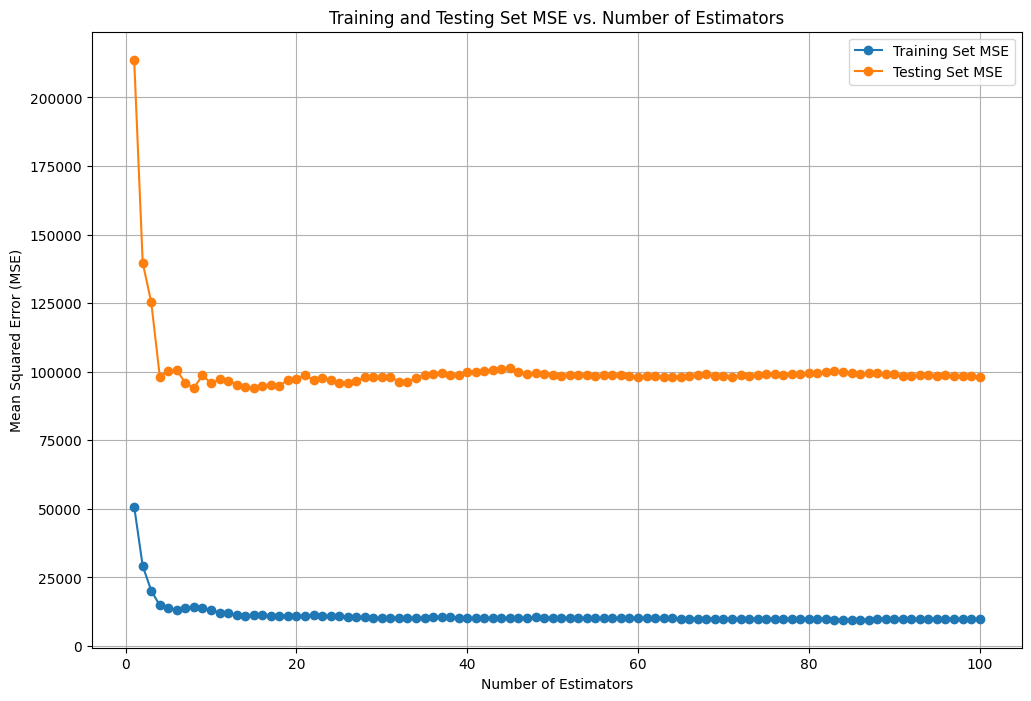

In [96]:
plt.figure(figsize=(12, 8))
plt.plot(estimators_range, train_mse_values, marker='o', label='Training Set MSE')
plt.plot(estimators_range, test_mse_values, marker='o', label='Testing Set MSE')
plt.xlabel('Number of Estimators')
plt.ylabel('Mean Squared Error (MSE)')
plt.title('Training and Testing Set MSE vs. Number of Estimators')
plt.legend()
plt.grid(True)
plt.show()

#learning curve for 

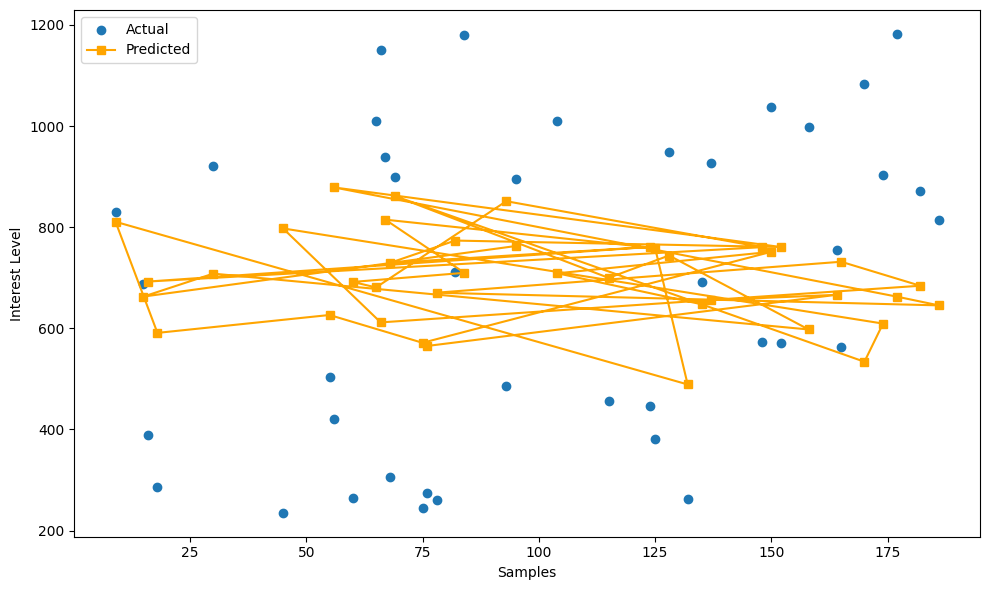

In [97]:
# trained regression model (model) to make predictions on a set of data that wasn't used during training. 
#X_test represents the feature matrix of this test dataset. 
#The predictions are stored in the y_pred variable.
y_pred = model.predict(X_test)

#DataFrame named result is created to organize and store the actual target values (y_test) and the predicted values (y_pred). 
#This DataFrame will help in comparing the actual and predicted values.
result = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
plt.figure(figsize=(10, 6))

#scatter plot
plt.scatter(result.index, result['Actual'], label='Actual', marker='o')
plt.plot(result.index, result['Predicted'], label='Predicted', linestyle='-', marker='s', color='orange')
plt.xlabel("Samples")
plt.ylabel("Interest Level")
plt.legend()
plt.tight_layout()
plt.show()

#making predictions using a regression model 
#and visualizing the comparison between the actual target values and the predicted values. 